## 建立 CNN

In [16]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

In [2]:
?Conv2D

In [17]:
# 1. Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

In [18]:
# 2. Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [19]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [20]:
# 3. Flattening
classifier.add(Flatten())

In [21]:
# 4. Fully Connection
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [22]:
classifier.compile(optimizer = 'adam', loss =
'binary_crossentropy', metrics = ['accuracy'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator
?ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)

In [24]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
training_set = train_datagen.flow_from_directory(
    'dataset/training_set', target_size = (64, 64),
     batch_size = 32,
     class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [24]:
! pip install Pillow

In [26]:
from PIL import Image

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_set = test_datagen.flow_from_directory(
    'dataset/test_set', target_size = (64, 64),
    batch_size = 32, 
    class_mode = 'binary')
               

Found 2000 images belonging to 2 classes.


## 餵資料進模型

In [28]:
from PIL import Image
classifier.fit_generator(training_set, steps_per_epoch = 8000,
epochs = 1, validation_data = test_set, validation_steps = 2000)
          

Epoch 1/1
8000/8000 [==============================] - 4253s 532ms/step - loss: 0.3943 - acc: 0.8128 - val_loss: 0.4803 - val_acc: 0.8102


## 預測單張圖片的類別

In [68]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)

type(test_image)


numpy.ndarray

In [69]:
test_image.shape

(64, 64, 3)

In [70]:
test_image = np.expand_dims(test_image, axis = 0)

In [71]:
test_image.shape

(1, 64, 64, 3)

In [79]:
result = classifier.predict_classes(test_image)

In [80]:
result

array([[1]], dtype=int32)

## Np.expand_dims

In [76]:
a = np.array([1,2,3])
print(a)
b = np.expand_dims(a, axis=0)
print(b)

[1 2 3]
[[1 2 3]]


## Pandas_DataReader

In [81]:
! pip install pandas-datareader

    100% |████████████████████████████████| 81kB 315kB/s ta 0:00:01
  Running setup.py bdist_wheel for requests-ftp ... done
  Stored in directory: /Users/davidchiu/Library/Caches/pip/wheels/76/fb/0d/1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
  Running setup.py bdist_wheel for requests-file ... done
  Stored in directory: /Users/davidchiu/Library/Caches/pip/wheels/3e/34/3a/c2e634ca7b545510c1b3b7d94dea084e5fdb5f33558f3c3a81
Successfully built requests-ftp requests-file


In [88]:
import pandas_datareader
fb = pandas_datareader.get_data_yahoo('FB')

Populating the interactive namespace from numpy and matplotlib


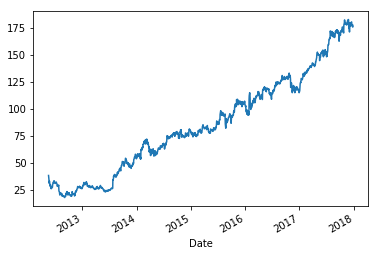

In [90]:
% pylab inline
fb['Close'].plot(kind = 'line')

## 讀取Google 股價

In [91]:
import pandas
dataset_train = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/fuboni/master/data/Google_Stock_Price_Train.csv')

In [92]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Populating the interactive namespace from numpy and matplotlib


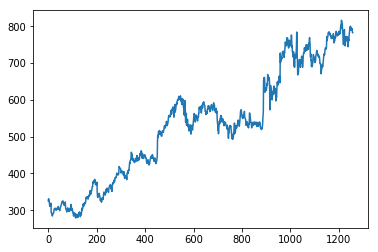

In [100]:
% pylab inline
dataset_train['Open'].plot(kind = 'line')

In [96]:
dataset_train.count()

Date      1258
Open      1258
High      1258
Low       1258
Close     1258
Volume    1258
dtype: int64

In [94]:
training_set = dataset_train.iloc[:, 1:2].values

In [95]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [101]:
training_set_scaled

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

In [102]:
len(training_set_scaled)

1258

In [106]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [108]:
len(X_train)
len(y_train)

1198

In [109]:
X_train.shape

(1198, 60)

In [110]:
y_train.shape

(1198,)

In [111]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [113]:
X_train.shape

(1198, 60, 1)